In [295]:
# -*- coding: utf-8 -*-

import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk import sent_tokenize
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from pyclustering.cluster import kmedoids
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
nltk.download('all')

pd.set_option('display.max_colwidth', None)
Data = pd.read_excel('./'+'2번데이터.xlsx', encoding='CP949')
Data.tail()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\user\A

,검색어,contents
55,starbucks,Starbucks’ holiday menu will return on Thursday.
56,starbucks,"For the holidays this year, Starbucks is sticking to proven customer favorites."
57,starbucks,Starbucks’ reusable holiday cups are also coming back.
58,starbucks,"Starbucks Canada has just launched two brand new drinks, and they sound next-level delicious."
59,starbucks,"This is because Starbucks is finally dropping two new drinks from its seasonal menu, and they sound as tasty as ever."


In [296]:
data = []
for i in Data.contents:
    data.append(i)
data

['We already know that Captain America, the Hulk, Iron Man, Black Widow, and Thor will all be back in action in one of the most anticipated games of the year alongside Ms. Marvel.',
 'The Hulk has no substantial future in the MCU following Avengers: Endgame.',
 'Avengers: Endgame is a 2019 American superhero film based on the Marvel Comics superhero team the Avengers, produced by Marvel Studios and distributed by Walt Disney Studios Motion Pictures.',
 "Earth's Mightiest Heroes are set to return to the screen this September, in Square Enix's Marvel's Avengers.",
 'The film was announced in October 2014 as Avengers: Infinity War – Part 2, but Marvel later removed this title.',
 "The writers of Avengers: Endgame recently revealed Nebula very nearly wore the Infinity Gauntlet in the Marvel Studios blockbuster, but the scene was removed from the script in early stages because they felt it undercut Tony Stark's climactic moment.",
 "They knew it had to end with Tony Stark's sacrifice becaus

In [297]:
tokenizer=RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')

texts = []

for w in data:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    texts.append(stopped_tokens)
print(texts)

[['already', 'know', 'captain', 'america', 'hulk', 'iron', 'man', 'black', 'widow', 'thor', 'back', 'action', 'one', 'anticipated', 'games', 'year', 'alongside', 'ms', 'marvel'], ['hulk', 'substantial', 'future', 'mcu', 'following', 'avengers', 'endgame'], ['avengers', 'endgame', '2019', 'american', 'superhero', 'film', 'based', 'marvel', 'comics', 'superhero', 'team', 'avengers', 'produced', 'marvel', 'studios', 'distributed', 'walt', 'disney', 'studios', 'motion', 'pictures'], ['earth', 'mightiest', 'heroes', 'set', 'return', 'screen', 'september', 'square', 'enix', 'marvel', 'avengers'], ['film', 'announced', 'october', '2014', 'avengers', 'infinity', 'war', 'part', '2', 'marvel', 'later', 'removed', 'title'], ['writers', 'avengers', 'endgame', 'recently', 'revealed', 'nebula', 'nearly', 'wore', 'infinity', 'gauntlet', 'marvel', 'studios', 'blockbuster', 'scene', 'removed', 'script', 'early', 'stages', 'felt', 'undercut', 'tony', 'stark', 'climactic', 'moment'], ['knew', 'end', 'ton

In [298]:
h=[]
for i in texts:
    p=nltk.pos_tag(i)
    h.append(p)
h

[[('already', 'RB'),
  ('know', 'VB'),
  ('captain', 'NN'),
  ('america', 'IN'),
  ('hulk', 'NN'),
  ('iron', 'NN'),
  ('man', 'NN'),
  ('black', 'JJ'),
  ('widow', 'NN'),
  ('thor', 'NN'),
  ('back', 'RB'),
  ('action', 'NN'),
  ('one', 'CD'),
  ('anticipated', 'VBN'),
  ('games', 'NNS'),
  ('year', 'NN'),
  ('alongside', 'RB'),
  ('ms', 'VBD'),
  ('marvel', 'NN')],
 [('hulk', 'JJ'),
  ('substantial', 'JJ'),
  ('future', 'NN'),
  ('mcu', 'NN'),
  ('following', 'VBG'),
  ('avengers', 'NNS'),
  ('endgame', 'VBP')],
 [('avengers', 'NNS'),
  ('endgame', 'VBP'),
  ('2019', 'CD'),
  ('american', 'JJ'),
  ('superhero', 'NN'),
  ('film', 'NN'),
  ('based', 'VBN'),
  ('marvel', 'NN'),
  ('comics', 'NNS'),
  ('superhero', 'VBP'),
  ('team', 'NN'),
  ('avengers', 'NNS'),
  ('produced', 'VBD'),
  ('marvel', 'JJ'),
  ('studios', 'NNS'),
  ('distributed', 'VBN'),
  ('walt', 'JJ'),
  ('disney', 'NN'),
  ('studios', 'NNS'),
  ('motion', 'NN'),
  ('pictures', 'NNS')],
 [('earth', 'NN'),
  ('mightiest'

In [299]:
k=[]
for i in h:
    allnoun=[word for word, pos in i if pos in ['NN','NNS']]
    k.append(allnoun)
k

[['captain',
  'hulk',
  'iron',
  'man',
  'widow',
  'thor',
  'action',
  'games',
  'year',
  'marvel'],
 ['future', 'mcu', 'avengers'],
 ['avengers',
  'superhero',
  'film',
  'marvel',
  'comics',
  'team',
  'avengers',
  'studios',
  'disney',
  'studios',
  'motion',
  'pictures'],
 ['earth', 'heroes', 'return', 'square', 'enix', 'marvel', 'avengers'],
 ['film', 'avengers', 'war', 'part', 'marvel', 'title'],
 ['writers',
  'avengers',
  'infinity',
  'gauntlet',
  'marvel',
  'studios',
  'scene',
  'stages',
  'stark',
  'moment'],
 ['end',
  'tony',
  'stark',
  'sacrifice',
  'character',
  'universe',
  'robert',
  'downey',
  'jr',
  'contract',
  'write',
  'films'],
 ['latter',
  'conclusion',
  'nebula',
  'infinity',
  'gauntlet',
  'defeat',
  'thanos'],
 ['avengers', 'opportunity', 'kill', 'moment', 'growth', 'character'],
 ['avengers', 'disney', 'film', 'marvel', 'marketing', 'campaign'],
 ['opening',
  'avengers',
  'avengers',
  'thanos',
  'avail',
  'natasha',

In [300]:
for i in range(len(k)):
    k[i]=' '.join(k[i])
k

['captain hulk iron man widow thor action games year marvel',
 'future mcu avengers',
 'avengers superhero film marvel comics team avengers studios disney studios motion pictures',
 'earth heroes return square enix marvel avengers',
 'film avengers war part marvel title',
 'writers avengers infinity gauntlet marvel studios scene stages stark moment',
 'end tony stark sacrifice character universe robert downey jr contract write films',
 'latter conclusion nebula infinity gauntlet defeat thanos',
 'avengers opportunity kill moment growth character',
 'avengers disney film marvel marketing campaign',
 'opening avengers avengers thanos avail natasha sit compound failure bring world population',
 'course stark trillions film thanos snap installment avengers war',
 'week year avengers conclusion marvel films box office movie time',
 'avengers studio logo',
 'avengers war cap team avengers world secret help',
 'marvel theory avengers',
 'way process film',
 'spider man home hole plot avengers

In [301]:
vec = TfidfVectorizer()
X = vec.fit_transform(k)
X

<60x214 sparse matrix of type '<class 'numpy.float64'>'
	with 394 stored elements in Compressed Sparse Row format>

In [302]:
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

df

,absence,action,adventure,afternoon,agency,americans,anonymity,anything,audience,avail,...,void,war,way,week,widow,winter,world,write,writers,year
0,0.000000,0.316479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.348462,0.000000,0.000000,0.000000,0.000000,0.293788
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.446003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363549,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301666,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [303]:
kmeans = KMeans(n_clusters=3).fit(df)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [304]:
kmeans.labels_ == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [305]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-0.065271,0.134603
1,-0.040687,0.264048
2,-0.066976,0.467715
3,-0.029869,0.298197
4,-0.071939,0.451597
5,-0.054175,0.354597
6,-0.023915,0.114258
7,-0.025407,0.118285
8,-0.035438,0.222875
9,-0.064036,0.433199


In [306]:
principalDf.index=Data['검색어']

In [307]:
kmeans.labels_==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

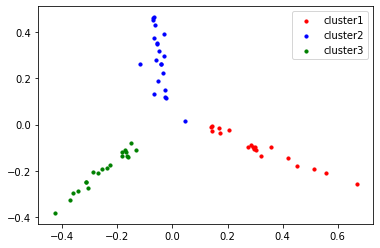

In [308]:
plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red', label = 'cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 0], principalDf.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 0], principalDf.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')
plt.legend()

In [309]:
import numpy as np

In [242]:
np.random.seed()
kmedoids_instance = kmedoids.kmedoids(df.values, initial_index_medoids = np.random.randint(15, size=3))
kmedoids_instance.process();

clusters = kmedoids_instance.get_clusters()
clusters

[[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19],
 [39,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [50,
  14,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59]]